/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

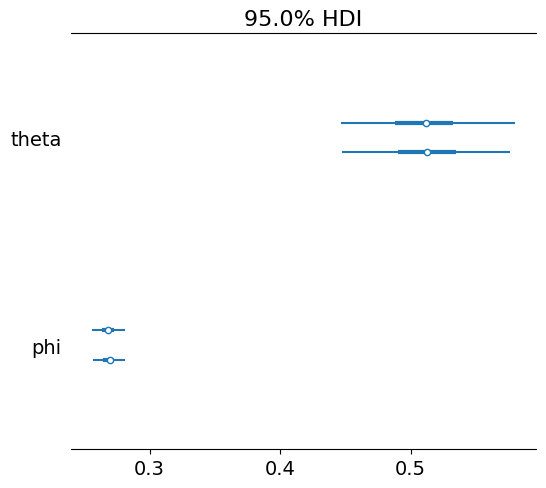

In [2]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
#Normal-gamma:
df = pd.read_csv('apple_quality.csv')
data = df['Juiciness'].values
model = pm.Model()
with model:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    likelihood = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=data)
    MH = pm.Metropolis([theta, phi], S=np.array([0.1]), tune=False, tune_interval=0)
    idata_MH = pm.sample(step=MH)
az.plot_forest(idata_MH, var_names=["theta","phi"], combined=False, hdi_prob=0.95)

In [3]:
az.summary(idata_MH)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.508,0.051,0.450,0.576,0.003,0.002,616.0,516.0,1.0
phi,0.274,0.056,0.257,0.281,0.005,0.003,527.0,303.0,1.0


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

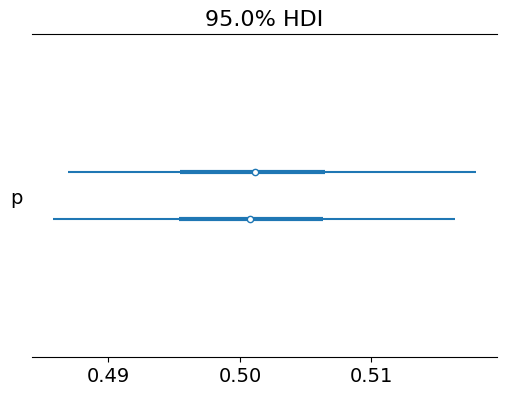

In [4]:
#Bernoulli:
data1 = df['quality'].values
model1 = pm.Model()
with model1:
  p = pm.Beta('p', alpha=1, beta=1)
  like = pm.Bernoulli('like', p=p, observed=data1)
  post = pm.sample(1000, tune=500)
az.plot_forest(post, var_names=["p"], combined=False, hdi_prob=0.95)

In [5]:
az.summary(post)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.501,0.008,0.486,0.516,0.0,0.0,813.0,1325.0,1.0
